# Project: Well Log Analysis in Python

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Research Questions">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be exploring a well log dataset, with the aim of developing useful insights and sharpening our data wranking skills using majorly descriptive statistics and data visualization. We will equally be leveraging on physics-based equations and assumptions for better interpretations and insights. 

> **About the data**

> The 118 wells [dataset](https://zenodo.org/record/4351156#.Yp-1HqjMKHu) spans the South and North Viking graben and penetrates a highly variable geology from the Permian evaporites in the south the the deeply buried Brent delta facies in the North. Some of samples of these well log datasets are from 118 wells in the Norwegian Sea that has been used in the FORCE 2020 machine learning competition with seismic and wells to predict the lithofacies using machine learning model.

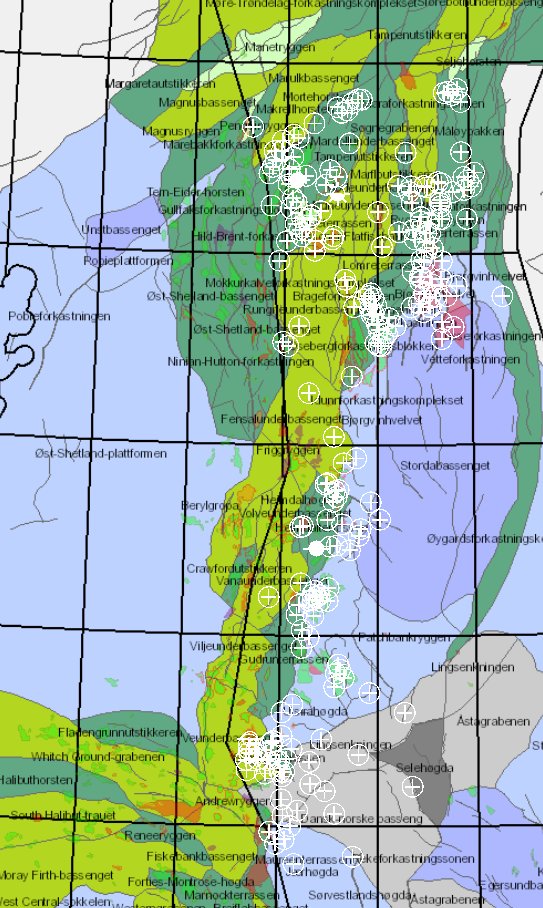

> **Data Attributes**
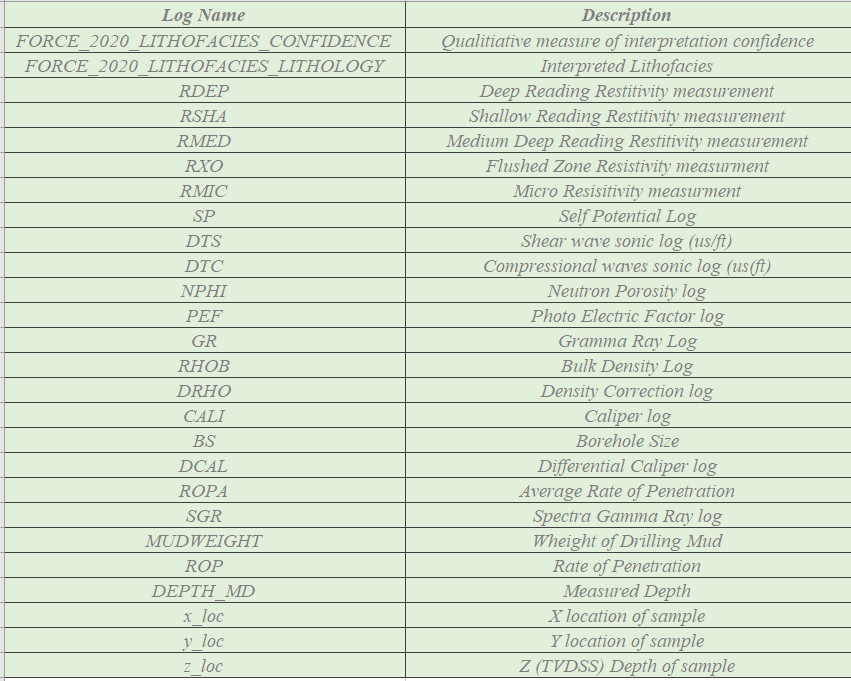

<a id='Research Questions'></a>
## Research Questions

>1. How many lithofacies are present and what are their percentages?

>2. What is the Lithofacies content by GR api?

>3. Are there traces of hydrocarbon and which type is prevalent?

>4. How Lithofacies vary with respect to depth?

>5. What is the well trajectory for these samples?

>6. What are the hole damages by Lithofacies types and Depth?

>7. What is the mud weight loss w.r.t depth for the Lithofacies ?

In [1]:
# import necessary libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import lasio
import missingno as msno

<a id='wrangling'></a>
## Data Wrangling

> Here, we will start first by loadiing the data and detecting various data quality issues associated with the data. The later sections will entail cleaning and handling the various identified data issues.

In [2]:
# Load your data
file_path = '15_9-23.las'
log = lasio.read(file_path)

In [3]:
print(log.curves)

Mnemonic                           Unit   Value  Description                        
--------                           ----   -----  -----------                        
DEPT                               m             DEPTH                              
FORCE_2020_LITHOFACIES_CONFIDENCE  _             FORCE_2020_LITHOFACIES_CONFIDENCE  
FORCE_2020_LITHOFACIES_LITHOLOGY   _             FORCE_2020_LITHOFACIES_LITHOLOGY   
CALI                               in            CALI                               
BS                                 in            BS                                 
DCAL                               in            DCAL                               
ROPA                               _             ROPA                               
ROP                                m/h           ROP                                
RDEP                               ohm.m         RDEP                               
RMED                               ohm.m         RMED            

In [4]:
# Convert Lasio object into pandas dataframe using df() command
log_df = log.df()
log_df.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.152,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.304,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.456,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.608,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# reset the index
log_df.reset_index(inplace=True)

In [6]:
# check for Depth column
log_df.head()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,...,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
0,110.000,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110.152,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110.304,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110.456,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110.608,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for the shape
log_df.shape

(20494, 21)

In [8]:
# checkout summary statistics of the data
log_df.describe()

,DEPT,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,...,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,20494.000000,11146.000000,11063.000000,11150.000000,20077.000000,11150.000000,20455.000000,20012.000000,20055.000000,19995.000000,...,11239.000000,11503.000000,10922.000000,20014.000000,11094.000000,11149.000000,20055.000000,20055.000000,2.005500e+04,20055.000000
mean,1667.468000,1.113404,65580.197776,12.051411,12.966075,0.249733,101.353447,133.330350,2.025926,1.701639,...,119.626325,0.301986,5.829028,79.629459,2.343702,0.051682,1697.488000,433912.400915,6.459996e+06,-1672.362359
std,899.270387,0.367189,9780.543173,1.318906,2.977957,0.421524,60.094520,92.430929,26.832728,17.684473,...,29.380767,0.126622,1.035687,41.094358,0.167173,0.033454,880.007672,9.118549,7.037634e+00,879.895041
min,110.000000,1.000000,30000.000000,8.263517,8.500000,-5.500000,7.814392,6.427914,0.180957,0.167987,...,58.998001,0.047880,1.803787,5.110291,1.257591,-2.004995,173.384003,433900.500000,6.459976e+06,-3196.091309
25%,888.734000,1.000000,65000.000000,12.271087,12.250001,0.065805,54.689701,65.989243,0.708296,0.717409,...,100.971672,0.196903,5.226100,50.599979,2.215610,0.035029,935.436005,433904.500000,6.459992e+06,-2434.349853
50%,1667.468000,1.000000,65000.000000,12.413791,12.250001,0.194294,87.491631,111.431744,1.106814,1.097203,...,133.516418,0.330473,5.890527,87.045456,2.323814,0.048370,1697.488037,433909.218750,6.460000e+06,-1672.432251
75%,2446.202000,1.000000,65030.000000,12.641795,17.500000,0.404340,133.166435,174.112171,1.600466,1.577373,...,139.684387,0.411698,6.406844,102.180246,2.496979,0.066368,2459.540039,433919.531250,6.460001e+06,-910.405365
max,3224.936000,3.000000,99000.000000,19.163353,17.500000,6.455294,439.485748,1233.716919,1660.598633,1625.149902,...,178.817993,0.709127,11.500422,411.181122,3.104144,0.207971,3221.592041,433933.531250,6.460002e+06,-148.380005


In [9]:
# get more information from the data
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20494 entries, 0 to 20493
Data columns (total 21 columns):
DEPT                                 20494 non-null float64
FORCE_2020_LITHOFACIES_CONFIDENCE    11146 non-null float64
FORCE_2020_LITHOFACIES_LITHOLOGY     11063 non-null float64
CALI                                 11150 non-null float64
BS                                   20077 non-null float64
DCAL                                 11150 non-null float64
ROPA                                 20455 non-null float64
ROP                                  20012 non-null float64
RDEP                                 20055 non-null float64
RMED                                 19995 non-null float64
DTS                                  10719 non-null float64
DTC                                  11239 non-null float64
NPHI                                 11503 non-null float64
PEF                                  10922 non-null float64
GR                                   20014 non-null

In [10]:
# check for missing data points by percentages
round((log_df.isnull().sum() / log_df.shape[0]) * 100, 2)

DEPT                                  0.00
FORCE_2020_LITHOFACIES_CONFIDENCE    45.61
FORCE_2020_LITHOFACIES_LITHOLOGY     46.02
CALI                                 45.59
BS                                    2.03
DCAL                                 45.59
ROPA                                  0.19
ROP                                   2.35
RDEP                                  2.14
RMED                                  2.43
DTS                                  47.70
DTC                                  45.16
NPHI                                 43.87
PEF                                  46.71
GR                                    2.34
RHOB                                 45.87
DRHO                                 45.60
DEPTH_MD                              2.14
X_LOC                                 2.14
Y_LOC                                 2.14
Z_LOC                                 2.14
dtype: float64

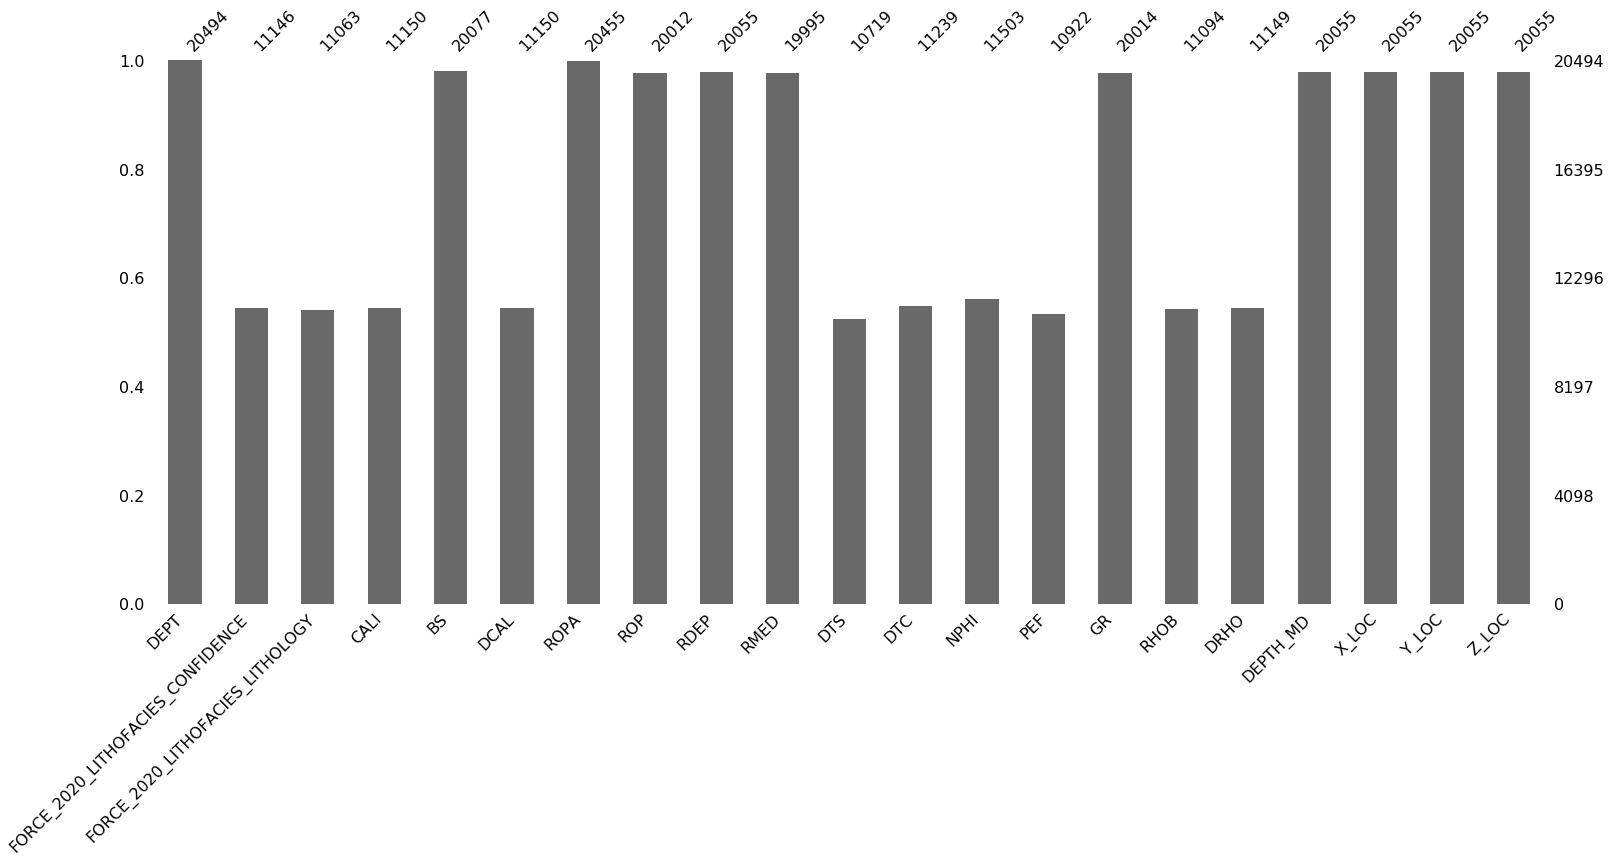

In [11]:
msno.bar(log_df)

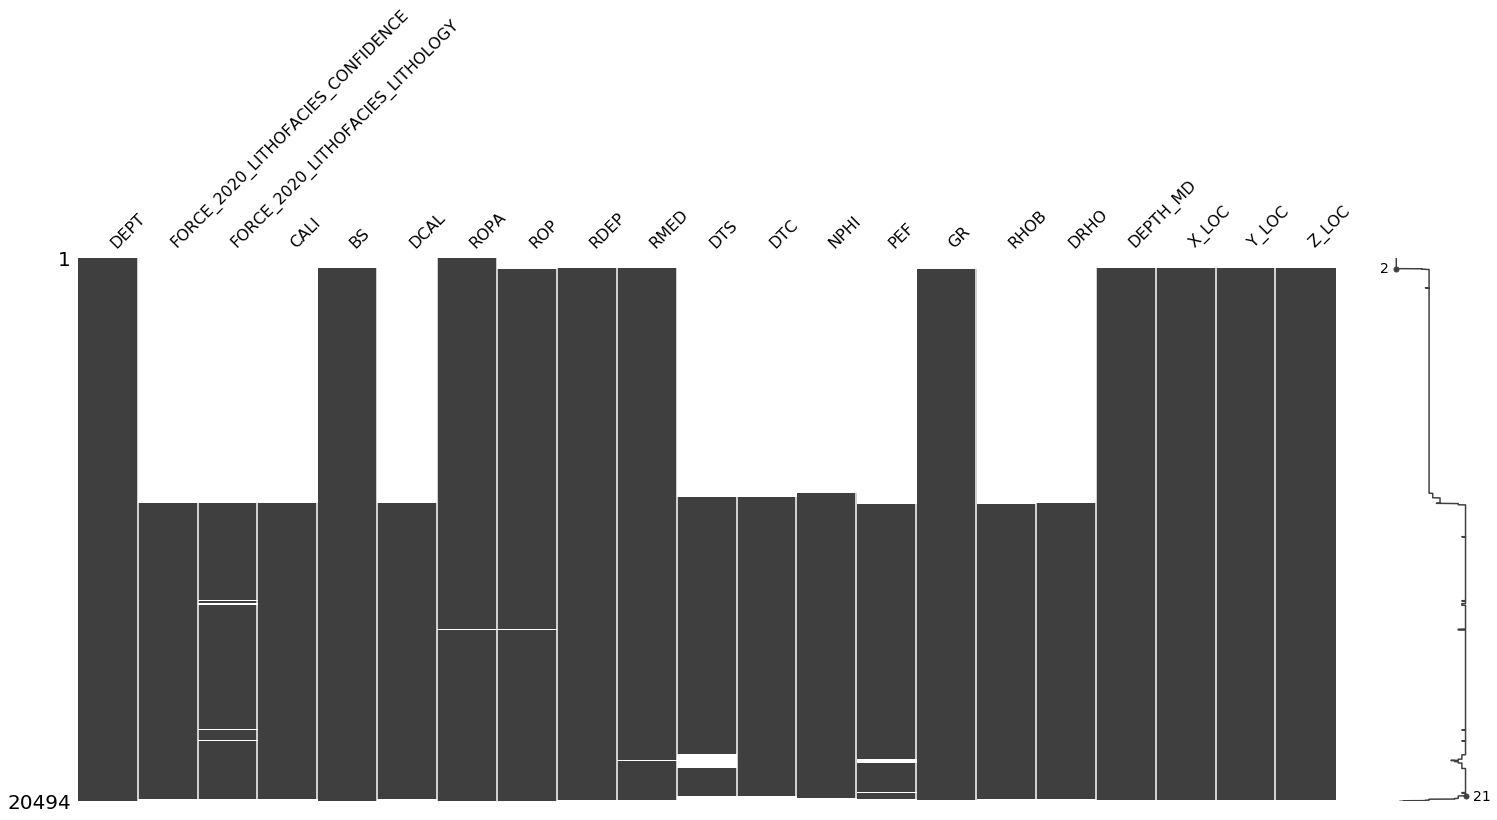

In [12]:
msno.matrix(log_df)

In [13]:
# check for duplicates
log_df.duplicated().sum()

0

### Data Cleaning
> After conducting basic analysis on the well data, we have identified some data quality issues which must be handled and they include; 
> ## Identified Issues
After conducting basic analysis on the data, we have identified some data quality issues which must be handled and they include:
1. **Missing values**
    * From the initial data exploration, we can observe that majority of our data points are missing e.g FORCE_2020_LITHOFACIES_CONFIDENCE, FORCE_2020_LITHOFACIES_LITHOLOGY, CALI etc.

In [14]:
# handling the missing data by dropping the data
log_df.dropna(inplace=True)

> 2. **Structural errors**
    * All the column names can be worked with except for the 'DEPT' which will be corrected to 'DEPTH'.

In [15]:
# renaming the 'DEPT' to DEPTH'
log_df = log_df.rename(columns={'DEPT': 'DEPTH'})

In [16]:
# We confirm the correction
log_df.head(1)

,DEPTH,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,...,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
9319,1526.488,3.0,65000.0,13.787042,12.250001,1.537043,122.394432,96.234421,0.841768,0.901045,...,147.079727,0.580942,10.584163,116.596664,2.052875,0.162041,1526.488037,433906.84375,6460000.5,-1501.449219


> 3. **Wrong Data Types**
    * Data types for "FORCE_2020_LITHOFACIES_LITHOLOGY" should be changed to an integer data type.

In [17]:
log_df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = log_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].astype(int)

In [18]:
log_df.dtypes

DEPTH                                float64
FORCE_2020_LITHOFACIES_CONFIDENCE    float64
FORCE_2020_LITHOFACIES_LITHOLOGY       int32
CALI                                 float64
BS                                   float64
DCAL                                 float64
ROPA                                 float64
ROP                                  float64
RDEP                                 float64
RMED                                 float64
DTS                                  float64
DTC                                  float64
NPHI                                 float64
PEF                                  float64
GR                                   float64
RHOB                                 float64
DRHO                                 float64
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> Here, we will begin to explore our data using both descriptive and visuals to give answers to our developed questions.

### Research Question 1 (How many lithofacies are present and what are their percentages?)

In [19]:
log_df.FORCE_2020_LITHOFACIES_LITHOLOGY.unique() # lithofacies codes

array([65000, 65030, 70000, 30000, 99000, 70032, 80000, 90000],
      dtype=int64)

It appears that our lithofacies are presented in codes (numberings), hence, for better analysis and easy identification, we need to replace these codes by their actual lithofacies names.

In [20]:
# lithofacies_numbers 
lithofacies_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [21]:
# replace the codes with their actaul names
log_df['LITH'] = log_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithofacies_numbers)

In [22]:
# we drop the FORCE_2020_LITHOFACIES_LITHOLOGY feature containing the codes
log_df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', inplace=True, axis=1)

In [23]:
log_df.head(1)

,DEPTH,FORCE_2020_LITHOFACIES_CONFIDENCE,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,...,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,LITH
9319,1526.488,3.0,13.787042,12.250001,1.537043,122.394432,96.234421,0.841768,0.901045,324.604279,...,0.580942,10.584163,116.596664,2.052875,0.162041,1526.488037,433906.84375,6460000.5,-1501.449219,Shale


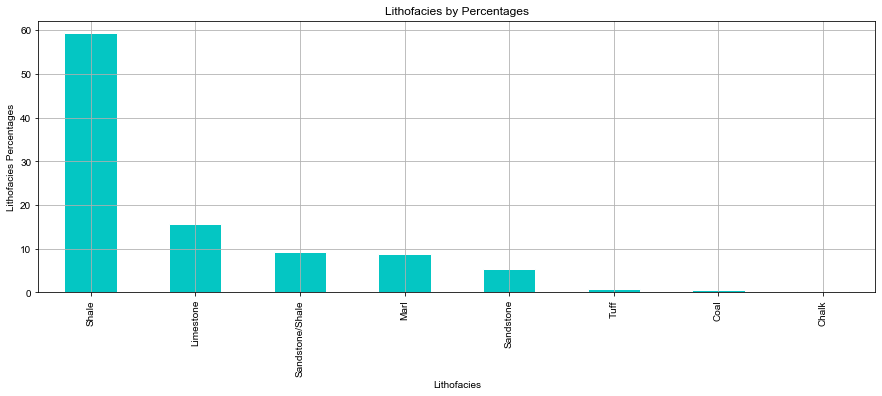

In [32]:
fig = plt.subplots(figsize=(15, 5))
plt.title('Lithofacies by Percentages')
# plt.style.use('ggplot')
sns.set_style("darkgrid")
plt.ylabel('Lithofacies Percentages')
plt.xlabel('Lithofacies')
(log_df['LITH'].value_counts() / log_df.shape[0] * 100).plot(kind='bar', color='#04C6C3');

In [25]:
# rounded off percentages by 2 decimal places
round(log_df['LITH'].value_counts() / log_df.shape[0] * 100, 2)

Shale              59.26
Limestone          15.74
Sandstone/Shale     9.15
Marl                8.85
Sandstone           5.37
Tuff                0.72
Coal                0.62
Chalk               0.28
Name: LITH, dtype: float64

> ### observations and findings
It therefore appears that this well has its highest and lowest lithofacies compositions to be **59.26% Shale** and **0.28% Chalk** respectively.

### Research Question 2  (What are the Lithofacies content by GR api?)

In [26]:
log_df.columns

Index(['DEPTH', 'FORCE_2020_LITHOFACIES_CONFIDENCE', 'CALI', 'BS', 'DCAL',
       'ROPA', 'ROP', 'RDEP', 'RMED', 'DTS', 'DTC', 'NPHI', 'PEF', 'GR',
       'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'LITH'],
      dtype='object')

In [27]:
# Continue 
log_df.head(1)

,DEPTH,FORCE_2020_LITHOFACIES_CONFIDENCE,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,...,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,LITH
9319,1526.488,3.0,13.787042,12.250001,1.537043,122.394432,96.234421,0.841768,0.901045,324.604279,...,0.580942,10.584163,116.596664,2.052875,0.162041,1526.488037,433906.84375,6460000.5,-1501.449219,Shale


In [28]:
log_df.describe()

,DEPTH,FORCE_2020_LITHOFACIES_CONFIDENCE,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,1.030200e+04,10302.000000
mean,2328.624961,1.094836,12.146624,11.883810,0.270668,98.428560,114.055925,1.429385,1.469477,262.728004,117.333233,0.303531,5.787910,81.318714,2.337673,0.052142,2328.624961,433918.452066,6.459993e+06,-2303.432832
std,472.123887,0.319928,1.175984,1.113212,0.276552,62.599060,77.712802,1.480843,1.558037,83.846897,29.201526,0.131574,1.037999,42.079629,0.168008,0.026521,472.123887,6.423387,6.723486e+00,472.019512
min,1526.488000,1.000000,8.263517,8.500000,-0.250000,8.523534,6.427914,0.180957,0.167987,115.207130,58.998001,0.047880,1.803787,11.680315,1.257591,-0.114307,1526.488037,433906.843750,6.459978e+06,-3168.600586
25%,1918.382000,1.000000,12.284774,12.250001,0.067011,46.928164,52.400230,0.600245,0.615897,177.854496,89.620287,0.183053,5.175030,48.852728,2.213041,0.035043,1918.381989,433914.312500,6.459988e+06,-2693.944458
50%,2327.756000,1.000000,12.424349,12.250001,0.195845,84.717655,93.261631,0.725436,0.742878,291.705902,132.060326,0.351626,5.856624,88.473129,2.311574,0.048301,2327.755981,433918.437500,6.459994e+06,-2302.579468
75%,2719.194000,1.000000,12.649884,12.250001,0.413569,133.971947,156.503143,1.627368,1.660207,338.399620,138.343929,0.414425,6.367297,108.084358,2.498231,0.066565,2719.193970,433922.468750,6.459999e+06,-1893.263092
max,3194.080000,3.000000,14.085253,12.250001,3.813223,439.485748,694.254578,17.415550,23.936893,378.333893,178.817993,0.709127,11.500422,355.676483,3.104144,0.207971,3194.080078,433932.718750,6.460000e+06,-1501.449219


### Research Question 3  (Are there traces of hydrocarbon and which type is prevalent?)

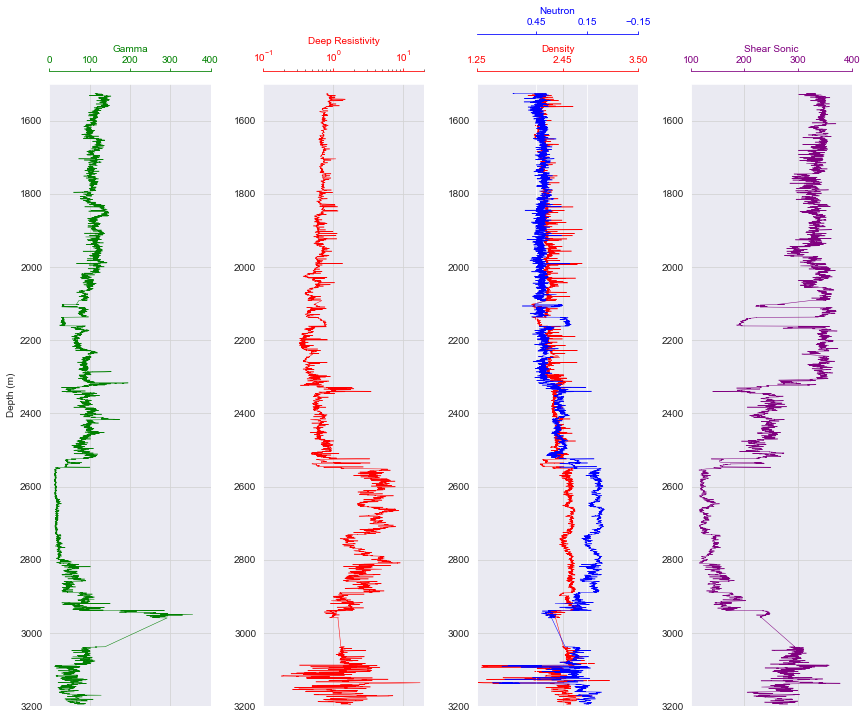

In [33]:
def well_log(data):
    
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
    ax4 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
    ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax12 = ax3.twiny()
    ax12.xaxis.set_visible(False)
    ax13 = ax4.twiny()
    ax13.xaxis.set_visible(False)

    # Gamma Ray track
    ax1.plot("GR", "DEPTH", data = log_df, color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 400)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 100, 200, 300, 400])

    # Resistivity track
    ax2.plot("RDEP", "DEPTH", data = log_df, color = "red", linewidth = 0.5)
    ax2.set_xlabel("Deep Resistivity")
    ax2.set_xlim(0.1, 20)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([0.1, 1, 10, 15, 20])
    ax2.semilogx()

    # Density track
    ax3.plot("RHOB", "DEPTH", data = log_df, color = "red", linewidth = 0.5)
    ax3.set_xlabel("Density")
    ax3.set_xlim(1.25, 3.5)
    ax3.xaxis.label.set_color("red")
    ax3.tick_params(axis='x', colors="red")
    ax3.spines["top"].set_edgecolor("red")
    ax3.set_xticks([1.25, 2.45, 3.50])

    # Sonic track
    ax4.plot("DTS", "DEPTH", data = log_df, color = "purple", linewidth = 0.5)
    ax4.set_xlabel("Shear Sonic")
    ax4.set_xlim(100, 400)
    ax4.xaxis.label.set_color("purple")
    ax4.tick_params(axis='x', colors="purple")
    ax4.spines["top"].set_edgecolor("purple")

    # Neutron track placed ontop of density track
    ax5.plot("NPHI", "DEPTH", data = log_df, color = "blue", linewidth = 0.5)
    ax5.set_xlabel('Neutron')
    ax5.xaxis.label.set_color("blue")
    ax5.set_xlim(0.8, 0.0)
    ax5.set_ylim(3200, 1500)
    ax5.tick_params(axis='x', colors="blue")
    ax5.spines["top"].set_position(("axes", 1.08))
    ax5.spines["top"].set_visible(True)
    ax5.spines["top"].set_edgecolor("blue")
    ax5.set_xticks([0.45,  0.15, -0.15])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_ylim(3200, 1500)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))


    plt.tight_layout()
well_log(log_df)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<a id='Summary'></a>
## Summary